In [1]:
# Importing required libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier

#from imblearn.over_sampling import SMOTE

%matplotlib inline

In [2]:
#import data 
income = pd.read_csv('D:/Downloads/adult_income.csv')

In [3]:
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# preprocessing

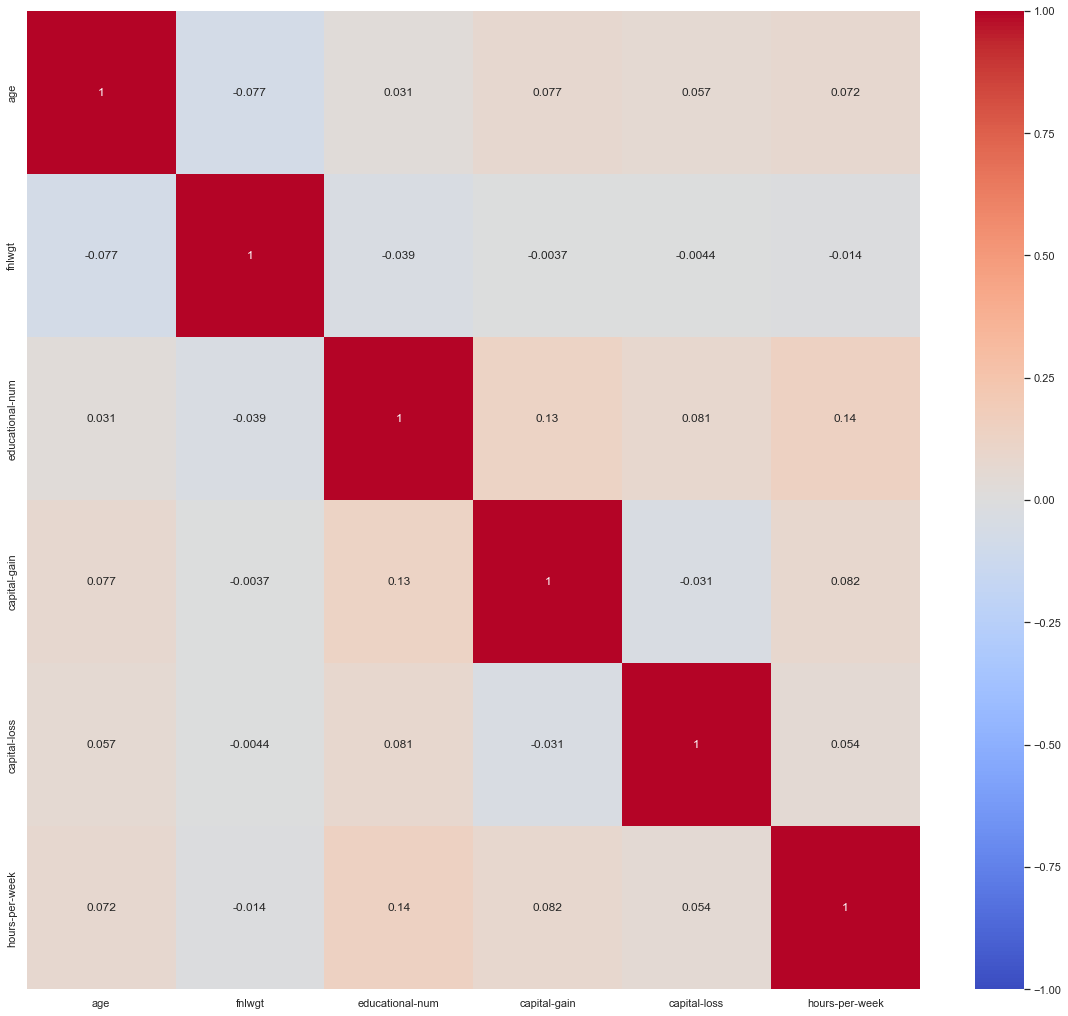

In [4]:
train_corr = income.corr()
# Setting the canvas size and font size
plt.figure(figsize=(20, 18))
sns.set(font_scale=1)

# Generate heat maps, adjust label rotation and color scale size
ax = sns.heatmap(
    train_corr,
    annot=True,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    cmap='coolwarm'
)

plt.show()

from corr plot we can see 'fnlwgt' has not correlation with other varaibles, therefore we drop this column 

In [5]:
income.drop('fnlwgt',inplace=True,axis=1)

cleaning null values and duplicates

In [23]:
income = income.replace('?',np.nan)
df_cleaned = income.drop_duplicates()

In [24]:
df_cleaned.isnull().mean()

age                0.000000
workclass          0.056772
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         0.057008
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.020086
income             0.000000
dtype: float64

In [25]:
# Original code by AkHiLdEvGoD

def inpute_nan(df,variable):
    df[variable].fillna(df[variable].value_counts().index[0],inplace=True)
    
nan_var = ['workclass','occupation','native-country']
for var in nan_var:
    inpute_nan(df_cleaned,var)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [26]:
df_cleaned.isnull().mean()

age                0.0
workclass          0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [27]:
bins = [17, 39, 59, 100]
labels = [0, 1, 2]

df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=bins, labels=labels, right=True)

C:\Users\HANBOS~1\AppData\Local\Temp/ipykernel_8880/603697604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=bins, labels=labels, right=True)


In [29]:
df_cleaned.drop('age',inplace=True,axis=1)

normalization

In [31]:
#normalization
#df_encoded = pd.get_dummies(df_cleaned, columns=[['workclass','education','marital-status','occupation','relationship','race','gender','native-country	']])
'''
df_encode = pd.get_dummies(df_cleaned, columns = ['workclass'])'''

columns=['workclass','education','marital-status','occupation','relationship','race','gender','native-country']

    
# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding
for col in columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

C:\Users\HANBOS~1\AppData\Local\Temp/ipykernel_8880/3811921492.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])


# modeling

In [34]:
X = df_cleaned.drop(columns='income')  # Features
y = df_cleaned['income']  # Target variable

In [35]:
scaler = MinMaxScaler()

# Apply normalization
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [36]:
X

,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,age_group
0,0.428571,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.95,1.0
1,0.428571,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.95,1.0
2,0.142857,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95,1.0
3,0.428571,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.95,1.0
4,0.428571,1.000000,0.600000,0.666667,0.692308,0.6,1.0,0.0,0.000000,0.0,0.295918,0.95,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42463,0.428571,0.800000,0.866667,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95,1.0
42464,0.428571,1.000000,0.600000,0.666667,0.769231,0.2,1.0,1.0,0.000000,0.0,0.397959,0.95,1.0
42465,0.428571,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.95,1.0
42466,0.428571,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.95,1.0


In [37]:
# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


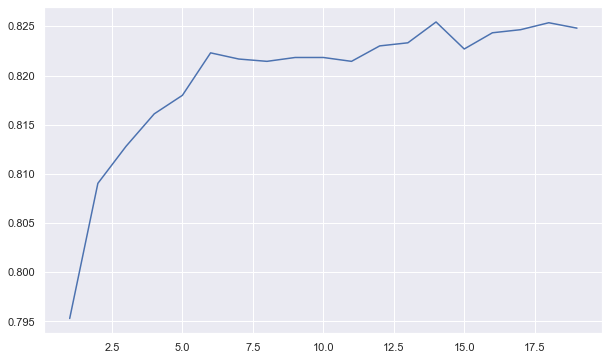

In [38]:
k_values = range(1,20)
accuracies = []

# Train and evaluate k-NN for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies)
plt.grid(True)
plt.show()

In [39]:

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=13)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X, y, cv=10)

# Output the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores):.2f}')

Cross-validation scores: [0.82293384 0.82858488 0.83023311 0.82481752 0.81916647 0.81893101
 0.82599482 0.82246291 0.83160622 0.82477626]
Average cross-validation score: 0.82


In [40]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {accuracy:.2f}')

Test set accuracy: 0.82


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.89      9606
        >50K       0.67      0.56      0.61      3135

    accuracy                           0.82     12741
   macro avg       0.77      0.74      0.75     12741
weighted avg       0.82      0.82      0.82     12741



In [44]:
f1_score(y_test, y_pred,average = 'macro')

0.7479348160284363

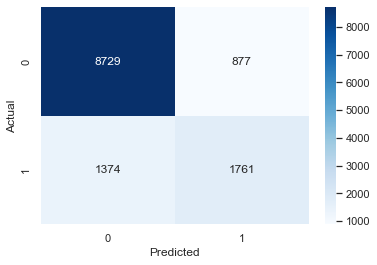

In [45]:

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


From above analysis we can see the model's accuracy for predicting the ">50K" class is significantly lower than for the "<=50K" class due to class imbalance.

In [57]:
# Adjusting the weights to focus more on the minority class
knn = KNeighborsClassifier(n_neighbors=13, weights='distance') 

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      9606
        >50K       0.68      0.54      0.60      3135

    accuracy                           0.82     12741
   macro avg       0.77      0.73      0.74     12741
weighted avg       0.81      0.82      0.82     12741



In [58]:
f1_score(y_test,y_pred,average = 'macro')

0.7458073736003945

In [73]:
y_proba = knn.predict_proba(X_test)

# Adjust threshold
y_pred_adjusted = (y_proba[:, 1] > 0.4)

In [59]:
def map_income(value):
    if value =='>50K':
        return True
    else:
        return False

# Apply the mapping function to y
y_adjusted = y_test.map(map_income)


In [61]:
print(classification_report(y_adjusted, y_pred_adjusted))

              precision    recall  f1-score   support

       False       0.88      0.87      0.87      9606
        True       0.61      0.64      0.63      3135

    accuracy                           0.81     12741
   macro avg       0.75      0.75      0.75     12741
weighted avg       0.81      0.81      0.81     12741



In [74]:

f1_score(y_adjusted, y_pred_adjusted, average='macro')


0.7501849517741928